In [3]:
import pandas as pd

fraud_df = pd.read_csv('../data/processed/merged_Fraud_Data.csv')


# __1.Transaction frequency & velocity:__

In [4]:
# Example: Number of purchases per user
fraud_df['purchase_count'] = fraud_df.groupby('user_id')['purchase_time'].transform('count')


# __2.Time-based:__

In [5]:
# Convert to datetime
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])


In [6]:
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek
fraud_df['time_since_signup'] = (
    (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600  # in hours
)


In [7]:
fraud_df.to_csv('../data/processed/feature_engineered_Fraud_Data.csv', index=False)
print("Done")

Done


<Axes: >

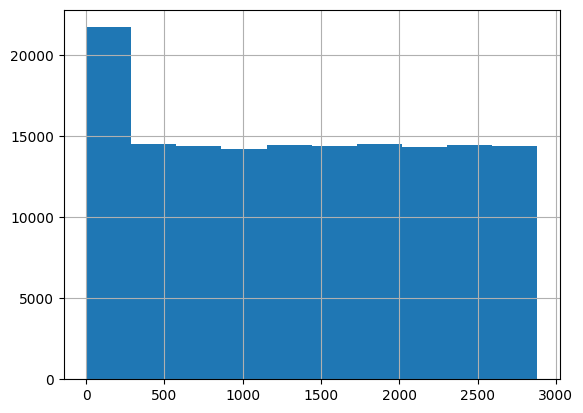

In [10]:
fraud_df['time_since_signup'].hist()
